# Plotting Multiple datasets for comparison

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 
%config InlineBackend.figure_formats = ['svg']


## Loading data from three seperate years
datasets are based off of the reef_current_speed notebooks data, in which 12 months of data was compressed into single .nc files

In [2]:
base = xr.open_dataset('baselineyear/w_2012_2013.nc')
elnino = xr.open_dataset('elninoyear/w_2009_2010.nc')
lanina = xr.open_dataset('laninayear/w_2010_2011.nc')

In [3]:
base

<xarray.Dataset>
Dimensions:   (xt_ocean: 80, yt_ocean: 80, Time: 365)
Coordinates:
  * xt_ocean  (xt_ocean) float64 115.1 115.2 115.2 115.3 ... 122.8 122.8 122.9
  * yt_ocean  (yt_ocean) float64 -20.95 -20.85 -20.75 ... -13.25 -13.15 -13.05
    sw_ocean  float64 ...
  * Time      (Time) datetime64[ns] 2012-10-01T12:00:00 ... 2013-09-30T12:00:00
Data variables:
    w         (Time, yt_ocean, xt_ocean) float32 ...
    absw      (Time, yt_ocean, xt_ocean) float32 ...

### creating a rolling mean for each year

In [4]:
base_rolling = base.rolling(Time=3, center=True).mean()
elnino_rolling = elnino.rolling(Time=3, center=True).mean()
lanina_rolling = lanina.rolling(Time=3, center=True).mean()

### creating a rolling mean for the region from the rolling mean above for each year

In [5]:
base_rolling_region = base_rolling.mean(dim=['xt_ocean','yt_ocean'])
elnino_rolling_region = elnino_rolling.mean(dim=['xt_ocean','yt_ocean'])
lanina_rolling_region = lanina_rolling.mean(dim=['xt_ocean','yt_ocean'])

In [6]:
# base_rolling_region.absw.plot()

In [7]:
# elnino_rolling_region.absw.plot()

In [8]:
baseV = base_rolling_region.absw.values.copy()
elninoV = elnino_rolling_region.absw.values.copy()
laninaV = lanina_rolling_region.absw.values.copy()

### Plotting the absolute velocity of the current for the entire region based off of a 3 day rolling mean, comparing each years average over the whole year.

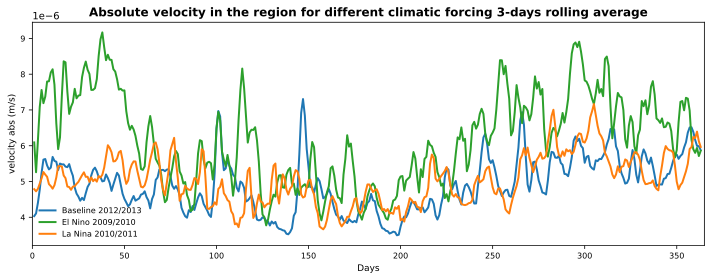

In [9]:
fig, ax1 = plt.subplots(figsize=(10, 4), dpi=300)

ax1.plot(np.arange(len(baseV)), baseV, '-', color='tab:blue', zorder=2, lw=2, 
         label='Baseline 2012/2013')

ax1.plot(np.arange(len(elninoV)), elninoV, '-', color='tab:green', zorder=2, lw=2, 
         label='El Nino 2009/2010')

ax1.plot(np.arange(len(laninaV)), laninaV, '-', color='tab:orange', zorder=2, lw=2, 
         label='La Nina 2010/2011')

ax1.tick_params(axis='y', labelcolor='k')
ax1.set_ylabel('velocity abs (m/s)', 
               color='k', fontsize=9)

plt.legend(frameon=False, prop={'size': 8}, loc=3)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel('Days', fontsize=9)
plt.xlim([0,len(baseV)])

plt.title('Absolute velocity in the region for different climatic forcing 3-days rolling average',weight='bold')
fig.tight_layout()

fig.tight_layout()
# plt.savefig('trend_surface.pdf')

plt.savefig('absvolregion')

### Adding each reefs specific coordinates to get an accurate absolute velocity and  the 3 day rolling mean specific to each reef
these coordinates can be changed to each specific reef sites coordinates to plot the absolute velocity for each specific reef.

In [10]:
reef_lat = -17.27
reef_lon = 119.36

In [11]:
basereef = base_rolling.sel(xt_ocean=reef_lon,yt_ocean=reef_lat,method='nearest')
elninoreef = elnino_rolling.sel(xt_ocean=reef_lon,yt_ocean=reef_lat,method='nearest')
laninareef = lanina_rolling.sel(xt_ocean=reef_lon,yt_ocean=reef_lat,method='nearest')

In [12]:
baseVreef = basereef.absw.values.copy()
elninoVreef = elninoreef.absw.values.copy()
laninaVreef = laninareef.absw.values.copy()

## Plotting the rolling mean for each year for each specific reef
in this case, I have plotted the absolute velocity for my two weather events, and a baseline year for comparison, for Clerke reef.

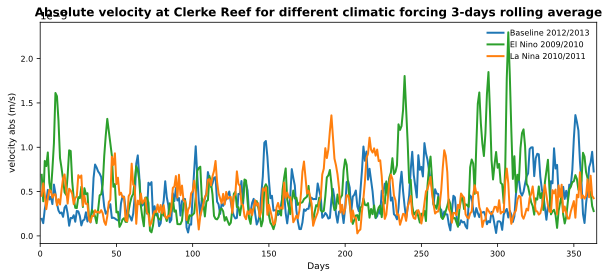

In [13]:
figure, ax1 = plt.subplots(figsize=(10, 4), dpi=300)

ax1.plot(np.arange(len(baseVreef)), baseVreef, '-', color='tab:blue', zorder=2, lw=2, 
         label='Baseline 2012/2013')

ax1.plot(np.arange(len(elninoVreef)), elninoVreef, '-', color='tab:green', zorder=2, lw=2, 
         label='El Nino 2009/2010')

ax1.plot(np.arange(len(laninaVreef)), laninaVreef, '-', color='tab:orange', zorder=2, lw=2, 
         label='La Nina 2010/2011')

ax1.tick_params(axis='y', labelcolor='k')
ax1.set_ylabel('velocity abs (m/s)', 
               color='k', fontsize=9)

plt.legend(frameon=False, prop={'size': 8}, loc=1)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)

plt.xlabel('Days', fontsize=9)
plt.xlim([0,len(baseVreef)])

plt.title('Absolute velocity at Clerke Reef for different climatic forcing 3-days rolling average',weight='bold')
fig.tight_layout()
# plt.savefig('trend_surface.pdf')


plt.savefig('clerkesurfacetrend.png')